# Dataset preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("~/code/akahrs/LoL-Final-Project/raw_data/LoL_match_data_2014_to_2022_unprocessed.csv")

/tmp/ipykernel_12461/2772853503.py:1: DtypeWarning: Columns (3,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("~/code/akahrs/LoL-Final-Project/raw_data/LoL_match_data_2014_to_2022_unprocessed.csv")


## Drop player columns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_cleaned = df[df["playerid"].isna()]

In [5]:
df_cleaned

,Unnamed: 0,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,10,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,100,Blue,team,NaN,NaN,Fnatic,oe:team:78f183fa5a7d8ecb22b9ad272c3abd7,NaN,Riven,Kha'Zix,Yasuo,NaN,NaN,1924,1,21,5,58,21,5,6.0,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.6549,0.8108,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,1.0,10.0,1.0,1.0,1.0,NaN,NaN,2.0,0.0,73848.0,2302.9522,NaN,2496.4553,0.0000,81.0,2.5260,6.0,0.1871,4.0,0.0,0.0000,59431.0,39633.0,1235.9563,NaN,40100.0,0.082711,NaN,741.0,152.0,137.0,15.0,27.8482,13851.0,17193.0,245.0,13970.0,17656.0,249.0,-119.0,-463.0,-4.0,4.0,6.0,3.0,3.0,3.0,4.0,22618.0,30237.0,435.0,21346.0,30174.0,458.0,1272.0,63.0,-23.0,5.0,7.0,3.0,3.0,3.0,5.0
11,11,TRLH3/33,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 17:52:02,1.0,3.15,200,Red,team,NaN,NaN,Gambit Gaming,oe:team:3e18c32708da93cf6bdbd1d20b76731,NaN,Kassadin,Nidalee,Elise,NaN,NaN,1924,0,5,21,8,5,21,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1559,0.8108,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,10.0,0.0,0.0,NaN,NaN,0.0,2.0,54372.0,1695.5925,NaN,3373.9709,0.0000,66.0,2.0582,13.0,0.4054,2.0,0.0,0.0000,45225.0,25427.0,792.9418,NaN,36915.0,-0.082711,NaN,739.0,173.0,144.0,29.0,28.4407,13970.0,17656.0,249.0,13851.0,17193.0,245.0,119.0,463.0,4.0,3.0,3.0,4.0,4.0,6.0,3.0,21346.0,30174.0,458.0,22618.0,30237.0,435.0,-1272.0,-63.0,23.0,3.0,3.0,5.0,5.0,7.0,3.0
22,22,TRLH3/44,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 19:16:29,1.0,3.15,100,Blue,team,NaN,NaN,Copenhagen Wolves,oe:team:6d92c120d5550d72128830b0a4df0f8,NaN,Lee Sin,Annie,Yasuo,NaN,NaN,2474,1,14,9,39,14,9,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.3395,0.5578,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,10.0,4.0,1.0,1.0,NaN,NaN,1.0,0.0,96967.0,2351.6653,NaN,2780.7357,0.0000,96.0,2.3282,16.0,0.3880,7.0,0.0,0.0000,70851.0,45828.0,1111.4309,NaN,48723.0,0.225353,NaN,880.0,200.0,166.0,34.0,26.1924,13792.0,18711.0,263.0,13971.0,19169.0,256.0,-179.0,-458.0,7.0,3.0,3.0,4.0,4.0,5.0,3.0,21194.0,29442.0,440.0,22343.0,30275.0,439.0,-1149.0,-833.0,1.0,3.0,3.0,5.0,5.0,7.0,3.0
23,23,TRLH3/44,complete,http://matchhistory.na.leagueoflegends.com/en/...,EU LCS,2014,Spring,0,2014-01-14 19:16:29,1.0,3.15,200,Red,team,NaN,NaN,Alliance,oe:team:05bd29b524f0851d42e7902d6af59bf,NaN,Kassadin,Kha'Zix,Ziggs,NaN,NaN,2474,0,9,14,16,9,14,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.2183,0.5578,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,4.0,10.0,0.0,0.0,NaN,NaN,0.0,1.0,82781.0

## Choose relevant columns

In [6]:
drop_columns = ["Unnamed: 0", "datacompleteness", "gameid", "url", "date", "game", "patch", "participantid", "position", "playername", "playerid", "teamid", "champion", "ban1", "ban2", "ban3", "ban4", "ban5", "kills", "deaths", "assists", "firstbloodkill", "firstbloodassist", "firstbloodvictim", "ckpm", "elementaldrakes", "opp_dragons", "infernals", "mountains", "clouds", "oceans", "opp_elementaldrakes", "chemtechs", "hextechs", "dragons (type unknown)", "elders", "opp_elders", "opp_heralds", "opp_barons", "opp_towers", "firstmidtower", "firsttothreetowers", "opp_turretplates", "opp_inhibitors", "totalgold", "damageshare", "earnedgoldshare", "goldspent", "gspd", "total cs", "opp_goldat10", "opp_xpat10", "opp_csat10", "opp_killsat10", "opp_assistsat10", "opp_deathsat10", "opp_goldat15", "opp_xpat15", "opp_csat15", "opp_killsat15", "opp_assistsat15", "opp_deathsat15", "monsterkillsownjungle", "monsterkillsenemyjungle", "split"]

In [7]:
df_cleaned = df_cleaned.drop(columns = drop_columns)

In [8]:
df_cleaned

,league,year,playoffs,side,teamname,gamelength,result,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,firstdragon,dragons,firstherald,heralds,firstbaron,barons,firsttower,towers,turretplates,inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,earnedgold,earned gpm,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
10,EU LCS,2014,0,Blue,Fnatic,1924,1,21,5,6.0,2.0,0.0,0.0,1.0,0.6549,0.0,0.0,NaN,NaN,1.0,1.0,1.0,10.0,NaN,2.0,73848.0,2302.9522,2496.4553,0.0000,81.0,2.5260,6.0,0.1871,4.0,0.0,0.0000,39633.0,1235.9563,741.0,152.0,27.8482,13851.0,17193.0,245.0,-119.0,-463.0,-4.0,4.0,6.0,3.0,22618.0,30237.0,435.0,1272.0,63.0,-23.0,5.0,7.0,3.0
11,EU LCS,2014,0,Red,Gambit Gaming,1924,0,5,21,0.0,0.0,0.0,0.0,0.0,0.1559,1.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,0.0,54372.0,1695.5925,3373.9709,0.0000,66.0,2.0582,13.0,0.4054,2.0,0.0,0.0000,25427.0,792.9418,739.0,173.0,28.4407,13970.0,17656.0,249.0,119.0,463.0,4.0,3.0,3.0,4.0,21346.0,30174.0,458.0,-1272.0,-63.0,23.0,3.0,3.0,5.0
22,EU LCS,2014,0,Blue,Copenhagen Wolves,2474,1,14,9,1.0,0.0,0.0,0.0,0.0,0.3395,0.0,0.0,NaN,NaN,1.0,1.0,0.0,10.0,NaN,1.0,96967.0,2351.6653,2780.7357,0.0000,96.0,2.3282,16.0,0.3880,7.0,0.0,0.0000,45828.0,1111.4309,880.0,200.0,26.1924,13792.0,18711.0,263.0,-179.0,-458.0,7.0,3.0,3.0,4.0,21194.0,29442.0,440.0,-1149.0,-833.0,1.0,3.0,3.0,5.0
23,EU LCS,2014,0,Red,Alliance,2474,0,9,14,0.0,0.0,0.0,0.0,1.0,0.2183,1.0,0.0,NaN,NaN,0.0,0.0,1.0,4.0,NaN,0.0,82781.0,2007.6233,2986.7340,0.0000,91.0,2.2070,14.0,0.3395,10.0,0.0,0.0000,29701.0,720.3153,877.0,165.0,25.2708,13971.0,19169.0,256.0,179.0,458.0,-7.0,4.0,5.0,3.0,22343.0,30275.0,439.0,1149.0,833.0,-1.0,5.0,7.0,3.0
34,EU LCS,2014,0,Blue,Alliance,2629,0,8,15,1.0,0.0,0.0,0.0,0.0,0.1826,1.0,0.0,NaN,NaN,0.0,0.0,1.0,4.0,NaN,0.0,81146.0,1851.9437,3122.6702,0.0000,119.0,2.7159,25.0,0.5706,7.0,0.0,0.0000,38390.0,876.1506,1035.0,197.0,28.1172,13923.0,18814.0,291.0,847.0,1271.0,22.0,0.0,0.0,1.0,22057.0,30901.0,489.0,2377.0,2379.0,55.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727933,LCS,2022,1,Red,Evil Geniuses,2112,0,10,16,1.0,1.0,0.0,0.0,0.0,0.2841,0.0,2.0,1.0,1.0,1.0,1.0,0.0,4.0,3.0,0.0,63660.0,1808.5227,3047.3295,2176.7045,100.0,2.8409,68.0,1.9318,40.0,215.0,6.1080,37027.0,1051.9034,943.0,207.0,32.6705,15169.0,18501.0,315.0,-1252.0,-300.0,-11.0,2.0,0.0,4.0,22785.0,29531.0,502.0,-3191.0,-2143.0,-50.0,2.0,0.0,6.0
727944,LCS,2022,1,Blue,Cloud9,2249,0,12,16,3.0,0.0,0.0,0.0,1.0,0.3201,0.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,6.0,0.0,85282.0,2275.1979,3691.4807,4190.0756,131.0,3.4949,50.0,1.3339,39.0,274.0,7.3099,39066.0,1042.2232,940.0,230.0,31.2139,15650.0,19094.0,328.0,-561.0,-295.0,-22.0,1.0,1.0,0.0,24879.0,29519.0,487.0,1838.0,2418.0,11.0,4.0,9.0,1.0
727945,LCS,2022,1,Red,Evil Geniuses,2249,1,16,12,3.0,0.0,0.0,0.0,0.0,0.4269,1.0,4.0,0.0,0.0,1.0,1.0,1.0,9.0,4.0,2.0,110798.0,2955.9271,3225.2735,3364.8288,98.0,2.6145,82.0,2.1876,38.0,268.0,7.1498,44632.0,1190.7159,977.0,205.0,31.5340,16211.0,19389.0,350.0,561.0,295.0,22.0,0.0,0.0,1.0,23041.0,27101.0,476.0,-1838.0,-2418.0,-11.0,1.0,4.0,4.0
727956,LCS,2022,1,Blue,Cloud9,2065,1,14,7,4.0,1.0,1.0,0.0,0.0,0.4068,1.0,4.0,0.0,0.0,0.0,1.0,1.0,6.0,5.0,1.0,74469.0,2163.7482,2677.2203,2743.8450,121.0,3.5157,52.0,1.5109,26.0,296.0,8.6005,39894.0,1159.1477,907.0,260.0,33.9080,15089.0,18881.0,338.0,99.0,977.0,-8.0,0.0,0.0,0.0,23583.0,31397.0,562.0,-150.0,1850.0,-3.0,0.0,0.0,0.0


## Filter for 2022 data

In [9]:
df_cleaned_22 = df_cleaned[df_cleaned["year"] == 2022]

## Identifying percentages of NaN values per column

In [10]:
df_cleaned_22.isnull().sum().sort_values(ascending=False) #NaN count for each column
Percentage_table = df_cleaned_22.isnull().sum().sort_values(ascending=False)/len(df_cleaned_22) #NaN percentage for each column

In [11]:
Percentage_table = pd.DataFrame(Percentage_table)

In [12]:
to_be_dropped_2 = Percentage_table[Percentage_table[0] != 0]

In [13]:
to_be_dropped_2 = list(to_be_dropped_2[to_be_dropped_2[0] > 0.152334].index.values)

In [14]:
df_cleaned_22 = df_cleaned_22.drop(columns=to_be_dropped_2)

In [15]:
df_cleaned_22.isnull().sum().sort_values(ascending=False) #NaN count for each column
Percentage_table = df_cleaned_22.isnull().sum().sort_values(ascending=False)/len(df_cleaned_22) #NaN percentage for each column

In [16]:
Percentage_table

cspm                    0.151101
minionkills             0.151101
towers                  0.034097
dragons                 0.034097
inhibitors              0.002026
barons                  0.002026
firstblood              0.001322
wardskilled             0.000088
wcpm                    0.000088
controlwardsbought      0.000088
wardsplaced             0.000088
visionscore             0.000088
vspm                    0.000088
earnedgold              0.000088
earned gpm              0.000088
monsterkills            0.000088
wpm                     0.000088
damagetochampions       0.000088
damagetakenperminute    0.000088
dpm                     0.000088
year                    0.000000
team kpm                0.000000
teamdeaths              0.000000
teamkills               0.000000
result                  0.000000
gamelength              0.000000
teamname                0.000000
side                    0.000000
playoffs                0.000000
league                  0.000000
dtype: flo

## Dropping rows with NaN values below threshold

In [17]:
##Columns with NaN for which rows are to be replaced by mean
replaced_by_median = ["towers", "dragons", "minionkills", "cspm"]

In [18]:
##Columns with NaN for which rows are to be dropped
to_be_dropped = ["wardsplaced", "firstblood", "inhibitors", "barons"]

In [19]:
df_cleaned_22 = df_cleaned_22.dropna(subset=to_be_dropped)

In [20]:
df_cleaned_22[df_cleaned_22.isna().any(axis=1)]

,league,year,playoffs,side,teamname,gamelength,result,teamkills,teamdeaths,firstblood,team kpm,dragons,barons,towers,inhibitors,damagetochampions,dpm,damagetakenperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,earnedgold,earned gpm,minionkills,monsterkills,cspm
578990,VL,2022,0,Blue,unknown team,1417,0,4,14,0.0,0.1694,NaN,0.0,NaN,0.0,11645.0,493.0840,593.5639,9.0,0.3811,5.0,0.2117,4.0,21.0,0.8892,4650.0,196.8948,165.0,4.0,7.1560
578991,VL,2022,0,Blue,unknown team,1417,0,4,14,0.0,0.1694,NaN,0.0,NaN,0.0,10453.0,442.6112,762.7241,4.0,0.1694,6.0,0.2541,6.0,23.0,0.9739,5589.0,236.6549,24.0,128.0,6.4361
578992,VL,2022,0,Blue,unknown team,1417,0,4,14,0.0,0.1694,NaN,0.0,NaN,0.0,6997.0,296.2738,412.1242,14.0,0.5928,1.0,0.0423,9.0,29.0,1.2279,5347.0,226.4079,215.0,8.0,9.4425
578993,VL,2022,0,Blue,unknown team,1417,0,4,14,0.0,0.1694,NaN,0.0,NaN,0.0,6332.0,268.1157,306.4785,11.0,0.4658,4.0,0.1694,5.0,25.0,1.0586,3810.0,161.3267,172.0,0.0,7.2830
578994,VL,2022,0,Blue,unknown team,1417,0,4,14,0.0,0.1694,NaN,0.0,NaN,0.0,2783.0,117.8405,392.3500,24.0,1.0162,6.0,0.2541,10.0,47.0,1.9901,1513.0,64.0649,29.0,0.0,1.2279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727681,LPL,2022,1,Red,Top Esports,2069,1,18,4,0.0,0.5220,2.0,2.0,11.0,3.0,67271.0,1950.8265,2807.6462,105.0,3.0449,57.0,1.6530,47.0,260.0,7.5399,48862.0,1416.9744,NaN,256.0,NaN
727728,LPL,2022,1,Blue,EDward Gaming,2411,0,16,13,1.0,0.3982,3.0,0.0,4.0,0.0,86535.0,2153.5048,3217.2791,120.0,2.9863,87.0,2.1651,50.0,364.0,9.0585,43475.0,1081.9162,NaN,227.0,NaN
727729,LPL,2022,1,Red,Top Esports,2411,1,13,16,0.0,0.3235,2.0,3.0,9.0,1.0,95316.0,2372.0282,2798.3492,144.0,3.5836,60.0,1.4932,66.0,319.0,7.9386,48701.0,1211.9701,NaN,285.0,NaN
727788,LPL,2022,1,Blue,EDward Gaming,2107,0,14,11,1.0,0.3987,4.0,1.0,7.0,0.0,64684.0,1841.9744,2357.6270,138.0,3.9298,70.0,1.9934,49.0,348.0,9.9098,42623.0,1213.7542,NaN,255.0,NaN


## Creating supportive dataframe with median values for rows with NaN values that are to be replaced with median

In [21]:
df_mean = df_cleaned_22.groupby(["teamname"])[replaced_by_median].agg("median")

In [22]:
df_mean = df_mean.add_suffix("_median")

## Merging supportive dataframe with main dataframe

In [23]:
df_merged = df_cleaned_22.merge(df_mean, how="left", on="teamname")

## Replacing NaN values for rows that are above threshold

In [24]:
for i in replaced_by_median:
    df_merged[i] = np.where(df_merged[i].isna(), df_merged[i + "_median"], df_merged[i])

In [25]:
df_merged = df_merged.drop(columns=list(df_mean.columns))

## Dropping rows with NaN values (TO BE DISCUSSED)

In [26]:
df_NaN = df_merged[df_merged.isna().any(axis=1)]

## Dropping additional columns with many NaN values

In [27]:
df_merged = df_merged.drop(columns=["cspm", "minionkills"])

In [28]:
df_merged = df_merged.dropna()

In [29]:
df_merged["teamname"].nunique()

533

In [30]:
df_final = df_merged

## Replacing leagues with values

In [31]:
#NOTimportanLEAGUES = ['WCS', 'LDL', 'WCS', 'NA CS', 'MSI', 'EU CS', 'LCK CL', 'TCL', 'VCS', 'LCSA', 'CK', 'CBLOL', 'OPL', 'LJL', 'LSPL', 'LMF', 'EM', 'LHE', 'LCL', 'UPL', 'UL', 'PRM', 'NLC', 'LFL', 'TRA', 'GLL', 'LVP DDH', 'PGN', 'LLA', 'SLO', 'SL', 'CLS', 'HM', 'Proving Grounds Circuit', 'RCL', 'EBL', 'DC', 'LLN', 'CBLOLA', 'UKLC', 'OTBLX', 'BRCC', 'HC', 'LAS', 'OCS', 'LTC', 'LCO', 'NEXO', 'BIG', 'CU', 'KeSPA', 'BM', 'LFL2', 'DL', 'BL', 'GL', 'VL', 'NASG', 'ESLOL', 'IEM', 'GPL', 'EL', 'TPL', 'LJLCS', 'UGP', 'CT', 'CIS CL', 'TCS', 'EGL', 'HS', 'LJLA', 'GSG', 'NEST', 'NERD', '2015 IWCI', 'AOL', 'MSC', 'Riot', 'LGL']
#ImportantLEAGUES=['LPL', 'NA LCS', 'EU LCS', 'LEC', 'LMS', 'LCK', 'LCS', 'PCS']

In [32]:
#df_merged['league'].replace(ImportantLEAGUES, 1, regex=True, inplace=True)
#df_merged['league'].replace(NOTimportanLEAGUES, 0, regex=True, inplace=True)

# Exploratory analysis

## Correlation analysis between features

In [33]:
corr = df_final.corr()

<AxesSubplot:>

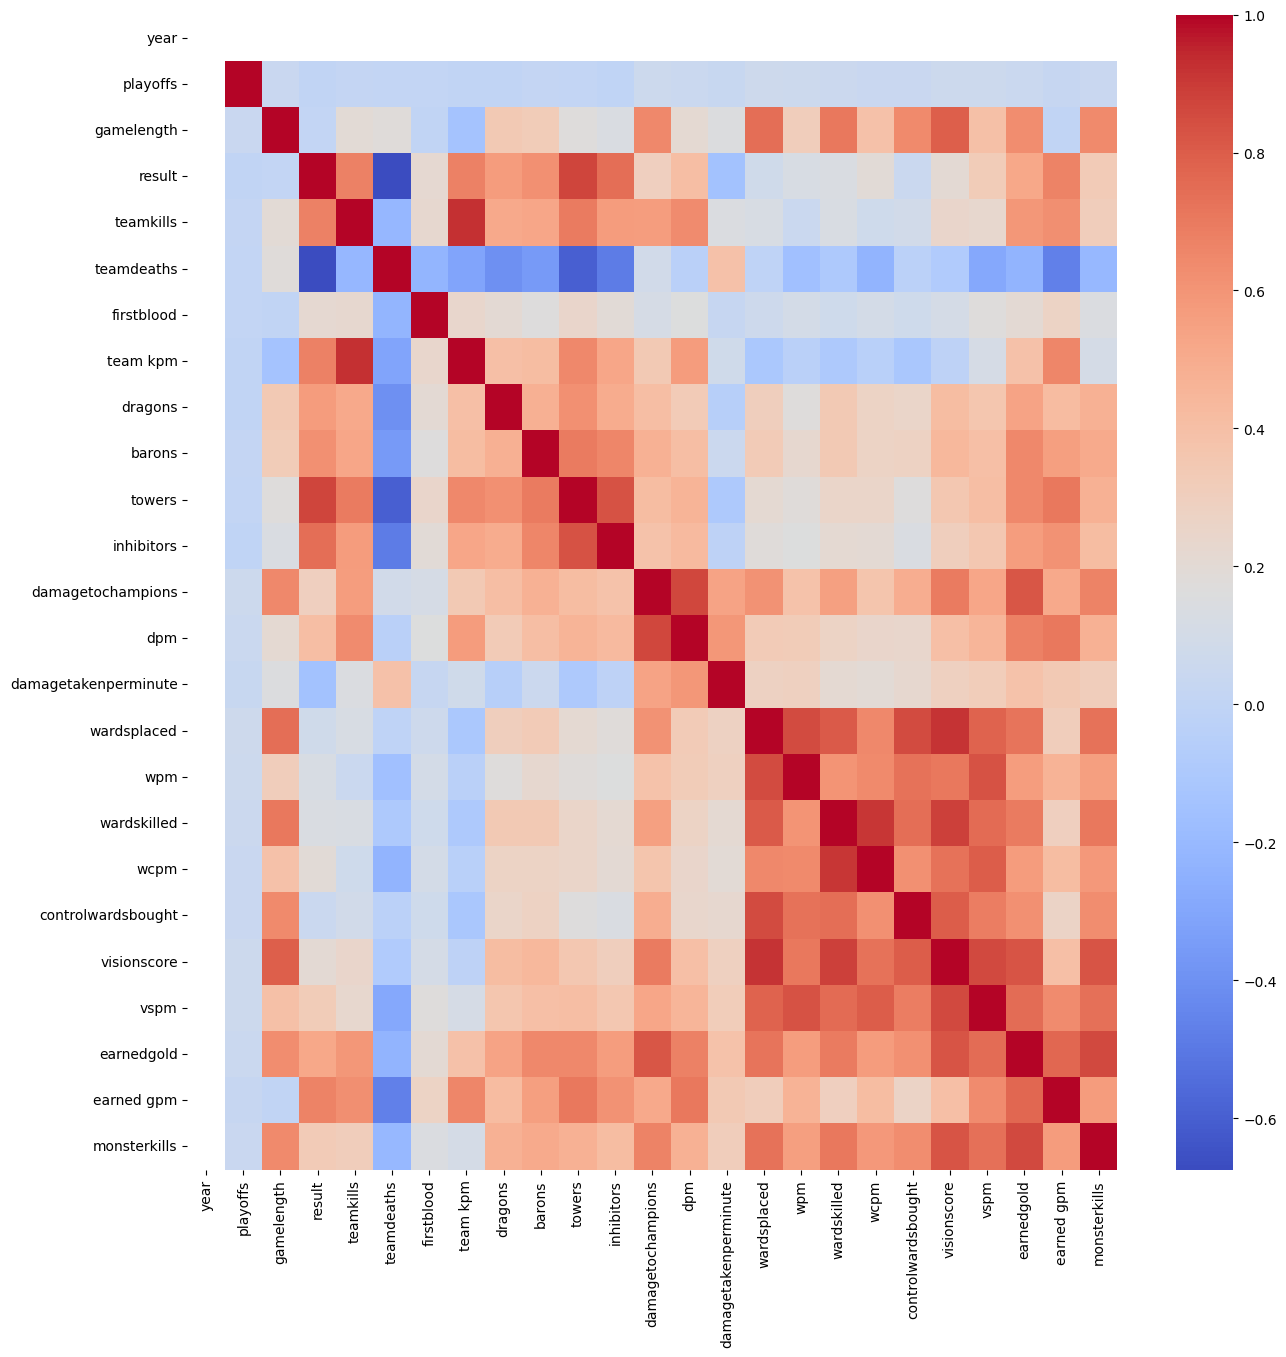

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="coolwarm")

## Drop highly correlated features

In [35]:
to_be_dropped_3 = ["year", "playoffs", "teamkills", "damagetochampions", "wardsplaced", "wpm", "wardskilled", "wcpm", "controlwardsbought", "visionscore", "earnedgold"]

In [36]:
df_final = df_final.drop(columns=to_be_dropped_3)

In [37]:
df_final["structures"] = df_final["towers"] + df_final["inhibitors"]

In [38]:
df_final = df_final.drop(columns=["towers", "inhibitors"])

In [39]:
df_final

,league,side,teamname,gamelength,result,teamdeaths,firstblood,team kpm,dragons,barons,dpm,damagetakenperminute,vspm,earned gpm,monsterkills,structures
0,LHE,Blue,Bencheados,1776,0,27,0.0,0.3041,0.0,0.0,1727.2973,3445.1689,6.4527,925.3041,167.0,1.0
1,LHE,Red,Leviatan Esports Chile,1776,1,9,1.0,0.9122,4.0,1.0,2669.4257,2373.2770,6.9932,1403.7500,227.0,12.0
2,LHE,Blue,Bencheados,2012,1,4,0.0,0.5964,2.0,2.0,2170.2883,2527.9324,9.0954,1352.7734,236.0,14.0
3,LHE,Red,Leviatan Esports Chile,2012,0,20,1.0,0.1193,3.0,0.0,1342.2465,3028.9861,6.9483,886.4314,185.0,2.0
4,LHE,Blue,Bencheados,1871,1,5,1.0,0.4169,3.0,2.0,1645.5906,2928.5195,8.0812,1235.5318,232.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22647,LCS,Red,Evil Geniuses,2112,0,16,0.0,0.2841,2.0,1.0,1808.5227,3047.3295,6.1080,1051.9034,207.0,4.0
22648,LCS,Blue,Cloud9,2249,0,16,1.0,0.3201,1.0,0.0,2275.1979,3691.4807,7.3099,1042.2232,230.0,3.0
22649,LCS,Red,Evil Geniuses,2249,1,12,0.0,0.4269,4.0,1.0,2955.9271,3225.2735,7.1498,1190.7159,205.0,11.0
22650,LCS,Blue,Cloud9,2065,1,7,0.0,0.4068,4.0,1.0,2163.7482,2677.2203,8.6005,1159.1477,260.0,7.0


<AxesSubplot:xlabel='firstblood', ylabel='Count'>

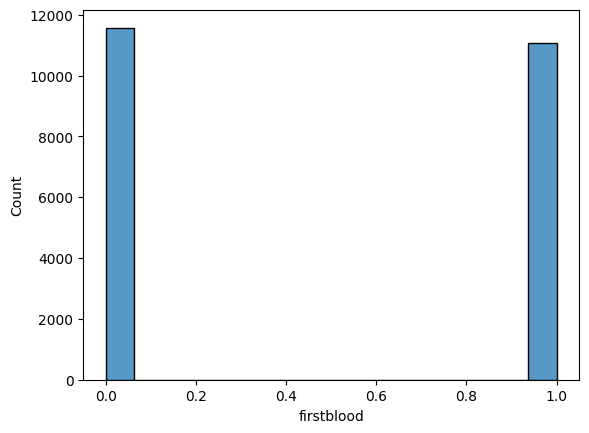

In [53]:
sns.histplot(df_final["firstblood"])

In [54]:
df_final.to_csv("~/code/akahrs/LoL-Final-Project/data_cleaned/team_data_cleaned_2022.csv")